Erstelle ein Jupyter Notebook, erzeuge aus titanic.csv ein DataFrame u beantworte
folgende Fragen:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('titanic.csv')

#### Titel aus dem Namen extrahieren
Schreibe eine Funktion, die den Titel (z. B. “Mr.”, “Miss”, “Dr.”) aus der Name -Spalte
extrahiert. Verwende apply , um diese Funktion auf die Name -Spalte anzuwenden
und erstelle eine neue Spalte Title . Anschließend verwende value_counts , um
die Häufigkeit jedes Titels zu bestimmen. Der Name beginnt mit dem Titel. Dieser
wird mit einem . beendet. (siehe String-Methode split() )

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
def titel(name: str):
    sp_text = name.split(".")
    titel = sp_text[0].split(",")
    return titel[1].strip()

df['Titel']  = df['Name'].apply(titel)
df['Titel'].value_counts()

Titel
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

### Überlebenswahrscheinlichkeit nach Titel schätzen
Verwende die zuvor erstellte Title -Spalte und berechne für jede Titelkategorie
den durchschnittlichen Überlebensstatus ( Survived ). Nutze apply und
groupby , um die Überlebensrate nach Titel darzustellen (sortiert nach
Überlebensrate).


In [10]:
df.groupby('Titel')['Survived'].mean().sort_values(ascending=False)

Titel
Lady            1.000000
Ms              1.000000
Sir             1.000000
Mme             1.000000
the Countess    1.000000
Mlle            1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Major           0.500000
Col             0.500000
Dr              0.428571
Mr              0.156673
Capt            0.000000
Jonkheer        0.000000
Don             0.000000
Rev             0.000000
Name: Survived, dtype: float64

### Länge der Namen analysieren
Ersetze die Werte der Spalte Surveived mit alive bzw. dead .
Berechne die Anzahl der Zeichen im Name jeder Person und erstelle eine neue
Spalte NameLength . Verwende apply und bestimme die durchschnittliche
Namenslänge für Überlebende und Nicht-Überlebende.


In [ ]:
# df[ 'Survived_'] = df['Survived'].replace({0:'dead', 1: 'alive'})

In [13]:
y = lambda x: len(x)
df['NameLenght'] = df['Name'].apply(y)
df.groupby('Survived')['NameLenght'].mean()

Survived
0    24.531876
1    30.871345
Name: NameLenght, dtype: float64

### Überlebensrate basierend auf dem Fahrpreis
Teile die Passagiere in drei Gruppen anhand des Fahrpreises ( Fare ) auf. Überlege,
wie du diese Gruppen ungefähr gleichmäßig verteilen kannst. Berechne für jede
der drei Gruppen die durchschnittliche Überlebensrate und gib sie aus. (das
DataFrame kann mit sort_values(<Spaltenname>) sortiert werden

In [17]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
df['Fare'].isna().sum()

np.int64(0)

In [ ]:
df['Fare']

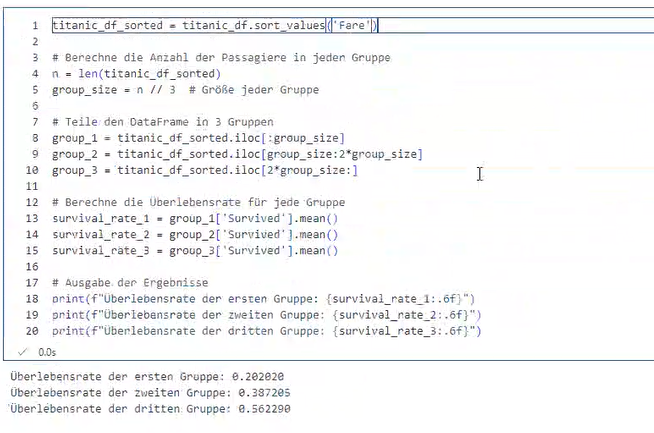

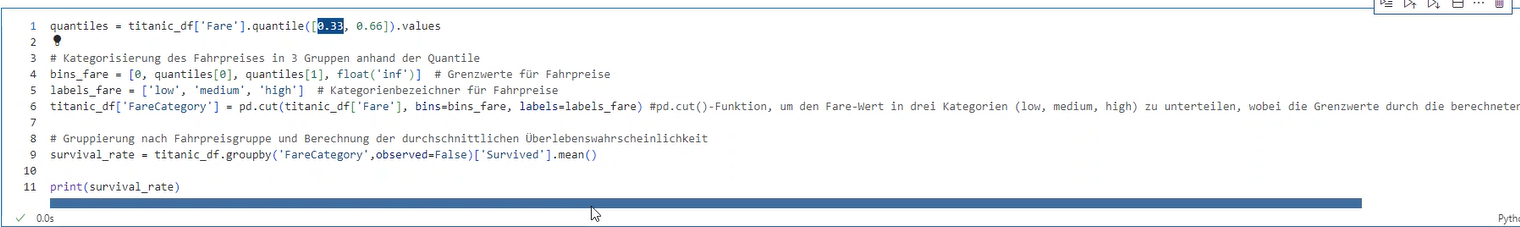

In [87]:
g1 = np.quantile(df['Fare'], 1/3)
g2 = np.quantile(df['Fare'], 2/3)
def grup_quant(x):
    if x <= g1:
        return 'cheap'
    elif x <= g2:
        return 'medium'
    else:
        return 'expensive'
    
df['Preis'] = df['Fare'].apply(grup_quant)
print(df.groupby('Preis')['Survived'].value_counts())
df.groupby('Preis')['Survived'].mean()

Preis      Survived
cheap      0           247
           1            61
expensive  1           165
           0           130
medium     0           172
           1           116
Name: count, dtype: int64


Preis
cheap        0.198052
expensive    0.559322
medium       0.402778
Name: Survived, dtype: float64

In [88]:
df.groupby('Preis').size()

Preis
cheap        308
expensive    295
medium       288
dtype: int64

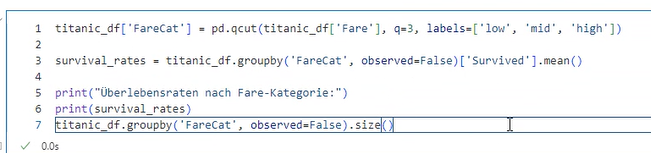

In [89]:
# Von Leherer
df['FareCat'] =pd.qcut(df['Fare'], q=3, labels=['low', 'mid', 'high'])
survival_rates =df.groupby('FareCat', observed=False)['Survived'].mean()
survival_rates

FareCat
low     0.198052
mid     0.402778
high    0.559322
Name: Survived, dtype: float64

In [90]:
df.groupby('FareCat', observed=False).size()

FareCat
low     308
mid     288
high    295
dtype: int64

### Analyse des Alters basierend auf Überlebensstatus
Untersuche das Alter ( Age ) der Überlebenden und Nicht-Überlebenden. Berechne
für jede Gruppe (Überlebende und Nicht-Überlebende) das Durchschnittsalter
sowie den Median. Erstelle einen KDE-Plot mit seaborn, um die Altersverteilung in
den beiden Gruppen visuell darzustellen. Die optionen fill =True und color="
<Farbe>" können benutzt werden um die Fläche unter der Dichtefunktion farbig
darzustellen

In [83]:
df['Age'].isna().sum()

np.int64(177)

In [84]:
gr = df.groupby('Survived')
mean_age = gr.Age.mean().to_frame()
median_age = gr.Age.median().to_frame()
not_surv_mean = mean_age.loc[0,'Age']
surv_mean = mean_age.loc[1, 'Age']
not_surv_median = median_age.loc[0, 'Age']
surv_median = median_age.loc[1, 'Age']
print(f' Durchschnittsalter der Überlebenden: {surv_mean}')
print(f' Durchschnittsalter der Nicht-Überlebenden: {not_surv_mean}')
print(f' Median der Überlebenden: {surv_median}')
print(f' Median der Nicht-Überlebenden: {not_surv_median}')

df.loc[df['Survived']==0, 'Age'] = df.loc[df['Survived']==0, 'Age'].fillna(not_surv_mean)
df.loc[df['Survived']==1, 'Age'] = df.loc[df['Survived']==1, 'Age'].fillna(surv_mean)

 Durchschnittsalter der Überlebenden: 28.343689655172415
 Durchschnittsalter der Nicht-Überlebenden: 30.62617924528302
 Median der Überlebenden: 28.0
 Median der Nicht-Überlebenden: 28.0


np.int64(0)

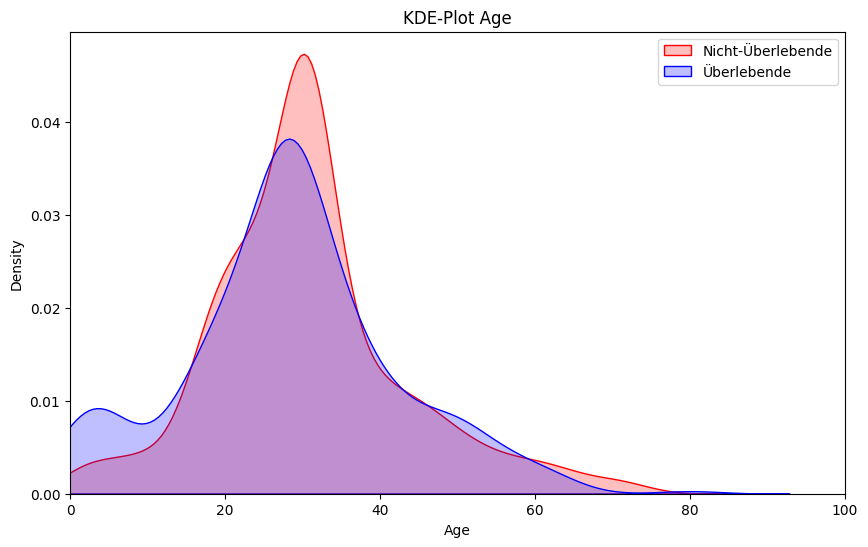

In [93]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Survived']==0]['Age'], label='Nicht-Überlebende', fill=True, color='red')
sns.kdeplot(df[df['Survived']==1]['Age'], label='Überlebende', fill=True, color='blue')
plt.title("KDE-Plot Age")
plt.xlim([0,100])
plt.legend()
plt.show()

## Aufgabenstellung: Passagiere ohne Familienmitglieder auf der Titanic

#### 1. Ermittlung von Alleinreisenden:
Berechne für jeden Passagier die FamilySize anhand der Spalten SibSp
(Anzahl der Geschwister/Ehepartner) und Parch (Anzahl der Eltern/Kinder).
Identifiziere alle Passagiere, deren FamilySize gleich 0 ist. Diese Passagiere
sind allein gereist, ohne Familienmitglieder an Bord.

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
#Uberprüfen, ob es NaN in 'Parch' und 'Sibsp' gibt
df['Parch'].isna().sum(), df['SibSp'].isna().sum()

(np.int64(0), np.int64(0))

In [ ]:
# Neue Spalte FamilySize erzeugen
df['FamilySize']  = df['SibSp'] + df['Parch'] + 1

In [69]:
# Neue Spalte für Alleinreisende (1) oder mit Familie (2)
df['TravelGroup'] = df['FamilySize'].apply(lambda x: 'alone' if x == 1 else 'with Family')
df_travel= df.groupby('TravelGroup').size().to_frame()
df_travel

,0
TravelGroup,
alone,537
with Family,354


#### 2. Anzahl der Alleinreisenden:
Berechne die Gesamtanzahl der Alleinreisenden und die prozentuale
Verteilung im Vergleich zur Gesamtanzahl aller Passagiere.

In [ ]:
alone_pas = df_travel.loc['alone', 0]

In [72]:
alone_pas / (alone_pas + df_travel.loc['with Family', 0]) * 100

np.float64(60.26936026936027)

#### 3. Analyse der Überlebensrate:
Untersuche die Überlebensrate der Alleinreisenden. Berechne den Anteil der
überlebenden Alleinreisenden und vergleiche ihn mit der Überlebensrate der
Passagiere, die mit Familienmitgliedern gereist sind (d. h., FamilySize > 1 ).

In [78]:
surv_al = df[df['FamilySize']==1].groupby('Survived').size().to_frame()
part_surv_al = (surv_al.loc[1,0]/(surv_al.loc[0,0] + surv_al.loc[1,0])).round(3)
part_surv_al

np.float64(0.304)

In [34]:
df_not_alone = df[df['FamilySize'] != 1]

In [79]:
surv_not_al = df[df['FamilySize']>1].groupby('Survived').size().to_frame()
part_surv_not_al = (surv_not_al.loc[1,0]/(surv_not_al.loc[0,0] + surv_not_al.loc[1,0])).round(3)
part_surv_not_al

np.float64(0.506)

In [80]:
print(f'der Anteil der überlebenden Alleinreisenden: {part_surv_al}')
print(f'der Überlebensrate der Passagiere mit Familienmitgliedern: {part_surv_not_al}')

der Anteil der überlebenden Alleinreisenden: 0.304
der Überlebensrate der Passagiere mit Familienmitgliedern: 0.506


#### 4. Visualisierung:
Stelle die Verteilung der Überlebensraten von Alleinreisenden und
Passagieren mit Familienmitgliedern in einem Säulendiagramm dar, um
Unterschiede zu veranschaulichen.

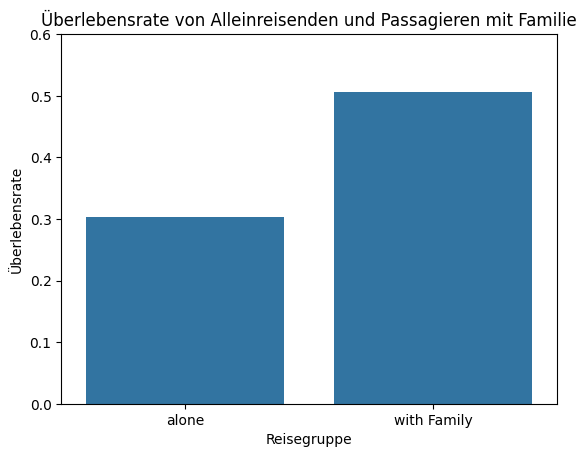

In [86]:
# Überlebensrate gruppieren nach 'TravelGroup'
survival_rates = df.groupby('TravelGroup')['Survived'].mean().reset_index()

# Säulendiagramm erstellen
sns.barplot(data=survival_rates, x='TravelGroup', y='Survived')
plt.title("Überlebensrate von Alleinreisenden und Passagieren mit Familie")
plt.xlabel("Reisegruppe")
plt.ylabel("Überlebensrate")
plt.ylim(0, 0.6)
plt.show()

#### 5. Zusätzliche Analyse :
Untersuche, ob es Unterschiede in der Verteilung der Alleinreisenden nach
anderen Merkmalen gibt, wie z. B. Pclass (Passagierklasse) oder Sex 

In [90]:
survival_counts_sex = df.groupby(['TravelGroup','Sex'])['Survived'].size().reset_index()
survival_counts_sex

,TravelGroup,Sex,Survived
0,alone,female,126
1,alone,male,411
2,with Family,female,188
3,with Family,male,166


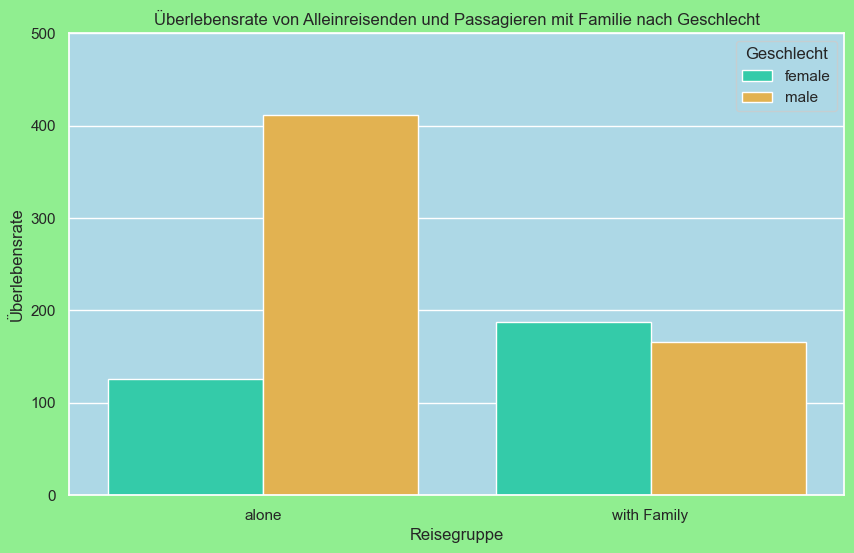

In [116]:
# Säulendiagramm erstellen 
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
# sns.set(rc={'axes.facecolor':'#33FFA2', 'figure.facecolor':'lightgrey'})
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})
# sns.set_theme(style='darkgrid') #white, darkgrid, whitegrid, dark, white, ticks
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_counts_sex, x='TravelGroup', y='Survived', hue='Sex', palette='turbo')
plt.title("Überlebensrate von Alleinreisenden und Passagieren mit Familie nach Geschlecht")
# plt. ('lightblue')
plt.xlabel("Reisegruppe")
plt.ylabel("Überlebensrate")
plt.ylim(0, 500)
plt.legend(title="Geschlecht")
plt.show()

In [ ]:
# Überlebensrate gruppieren nach 'TravelGroup' und 'Sex'
survival_rates_sex = df.groupby(['TravelGroup','Sex'])['Survived'].mean().reset_index()
survival_rates_sex

,TravelGroup,Sex,Survived
0,alone,female,0.785714
1,alone,male,0.155718
2,with Family,female,0.712766
3,with Family,male,0.271084


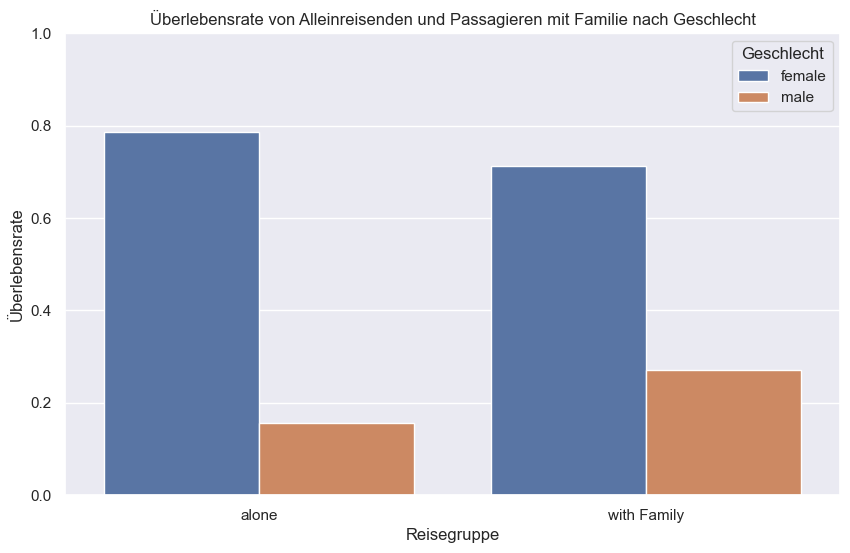

In [111]:
# Säulendiagramm erstellen 
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates_sex, x='TravelGroup', y='Survived', hue='Sex')
plt.title("Überlebensrate von Alleinreisenden und Passagieren mit Familie nach Geschlecht")
plt.xlabel("Reisegruppe")
plt.ylabel("Überlebensrate")
plt.ylim(0, 1)
plt.legend(title="Geschlecht")
plt.show()

In [93]:
# Überlebensrate gruppieren nach 'TravelGroup' und 'Pclass'
survival_counts_pclass = df.groupby(['TravelGroup','Pclass'])['Survived'].size().reset_index()
survival_counts_pclass

,TravelGroup,Pclass,Survived
0,alone,1,109
1,alone,2,104
2,alone,3,324
3,with Family,1,107
4,with Family,2,80
5,with Family,3,167


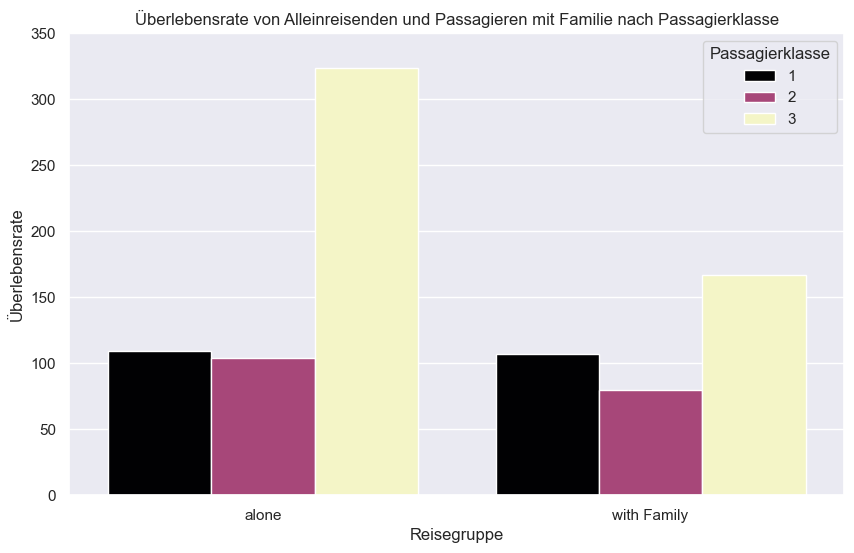

In [112]:
# Säulendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_counts_pclass, x='TravelGroup', y='Survived', hue='Pclass', palette='magma')
plt.title("Überlebensrate von Alleinreisenden und Passagieren mit Familie nach Passagierklasse")
plt.xlabel("Reisegruppe")
plt.ylabel("Überlebensrate")
plt.ylim(0, 350)
plt.legend(title="Passagierklasse")
plt.show()

In [ ]:
# Überlebensrate gruppieren nach 'TravelGroup' und 'Pclass'
survival_rates_pclass = df.groupby(['TravelGroup','Pclass'])['Survived'].mean().reset_index()
survival_rates_pclass

,TravelGroup,Pclass,Survived
0,alone,1,0.532110
1,alone,2,0.346154
2,alone,3,0.212963
3,with Family,1,0.728972
4,with Family,2,0.637500
5,with Family,3,0.299401


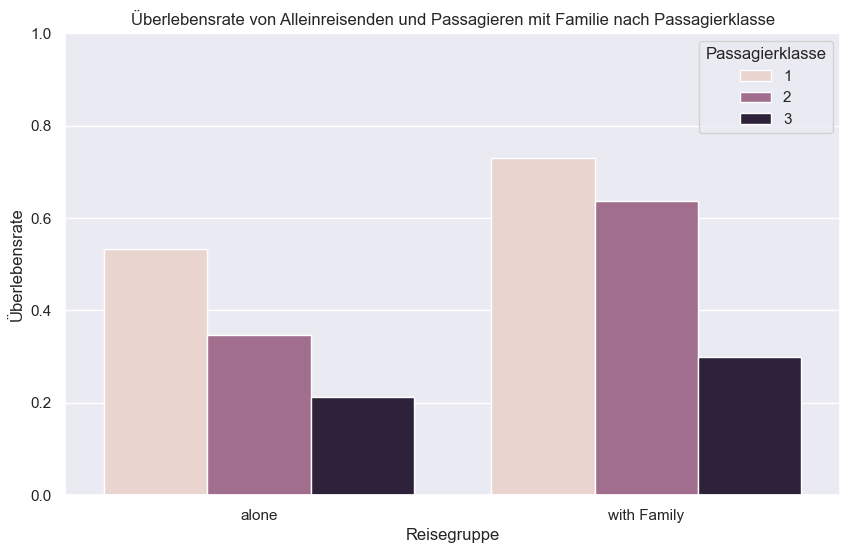

In [113]:
# Säulendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rates_pclass, x='TravelGroup', y='Survived', hue='Pclass')
plt.title("Überlebensrate von Alleinreisenden und Passagieren mit Familie nach Passagierklasse")
plt.xlabel("Reisegruppe")
plt.ylabel("Überlebensrate")
plt.ylim(0, 1)
plt.legend(title="Passagierklasse")
plt.show()

In [114]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

m=pd.DataFrame({'x':['1','1','2','2','13','13'],
                'y':np.random.randn(6)})

facet = sns.factorplot('x','y',data=m)

facet.set(axis_bgcolor='k')

plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'